In [1]:
# Step 1: Import pandas
import pandas as pd


df = pd.read_excel("heart_disease.xlsx" , sheet_name='Heart_disease')
df

df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [27]:
import pandas as pd

xls = pd.ExcelFile("heart_disease.xlsx")
print(xls.sheet_names)



['Description', 'Heart_disease']


In [21]:
#  1. Data Preparation:
# Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           12 non-null     float64
 1   Age in years  12 non-null     float64
dtypes: float64(2)
memory usage: 324.0 bytes


,age,Age in years
count,1.200000e+01,12.000000
mean,-2.544261e-17,0.000000
std,1.044466e+00,1.044466
min,-1.593255e+00,-1.593255
25%,-7.966275e-01,-0.796628
50%,0.000000e+00,0.000000
75%,7.966275e-01,0.796628
max,1.593255e+00,1.593255


age             0
Age in years    0
dtype: int64


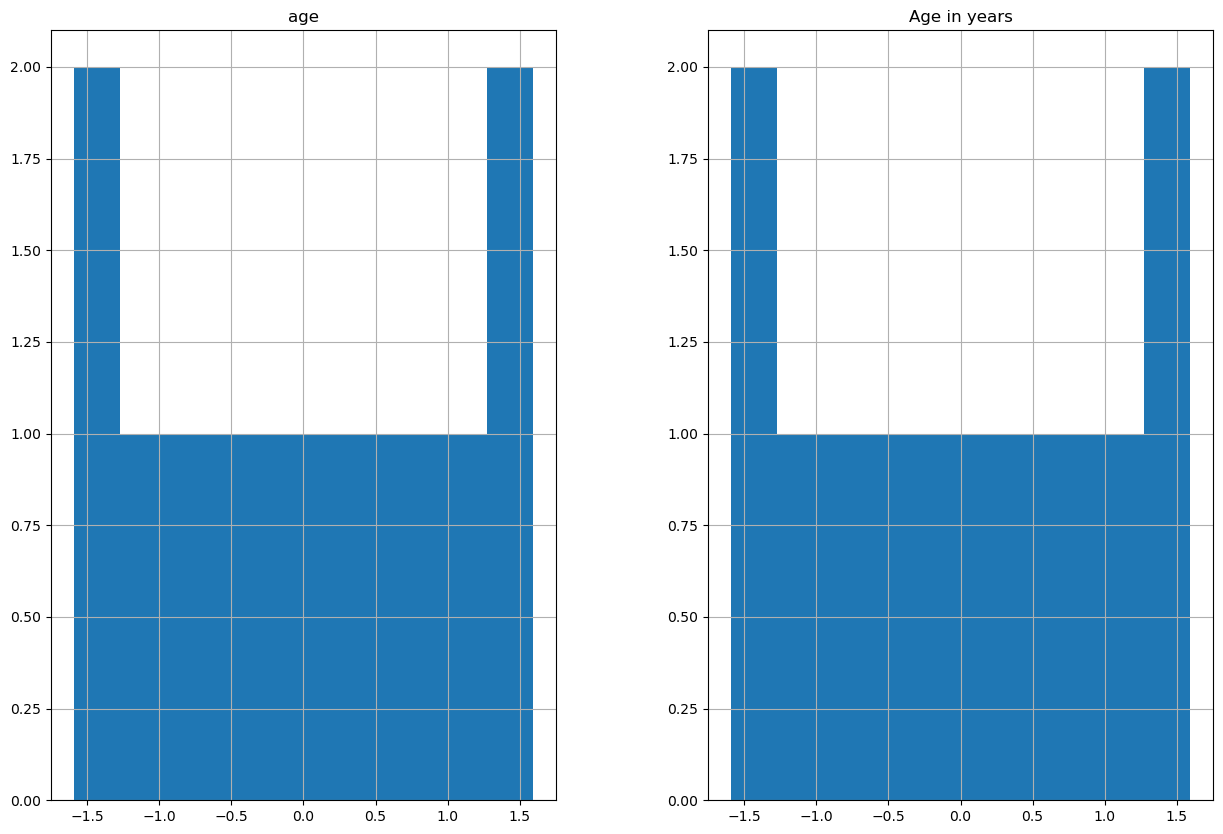

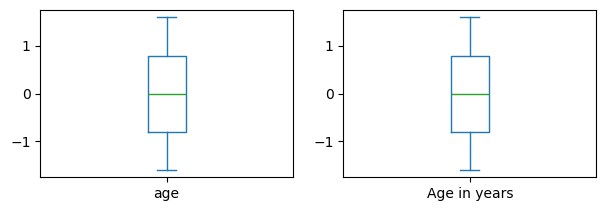

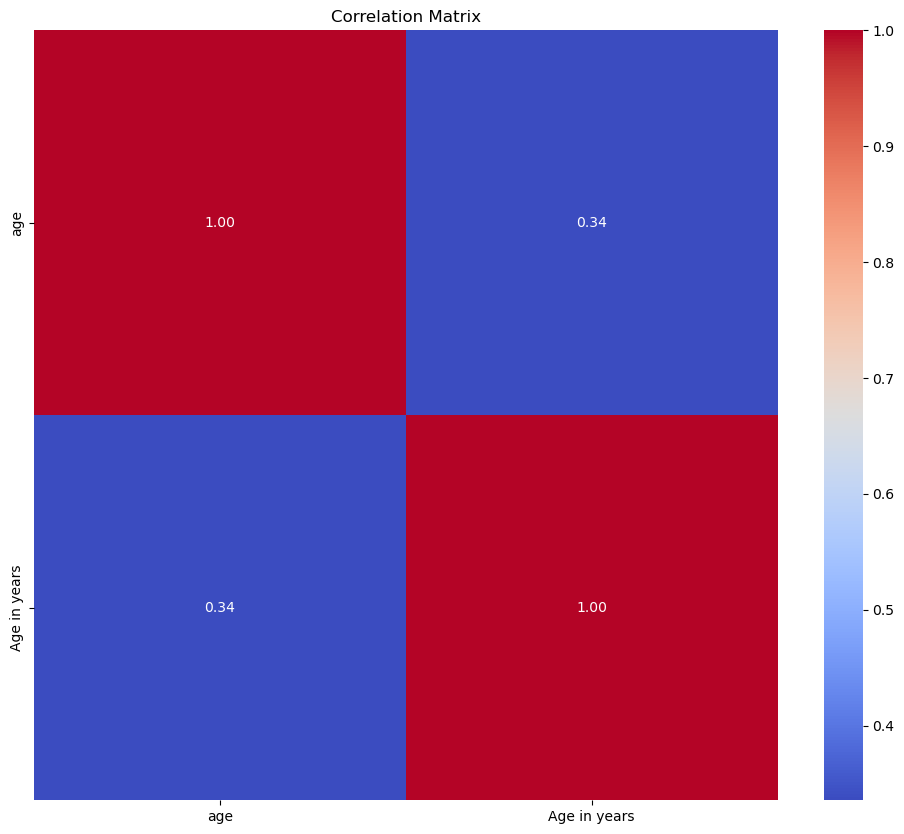

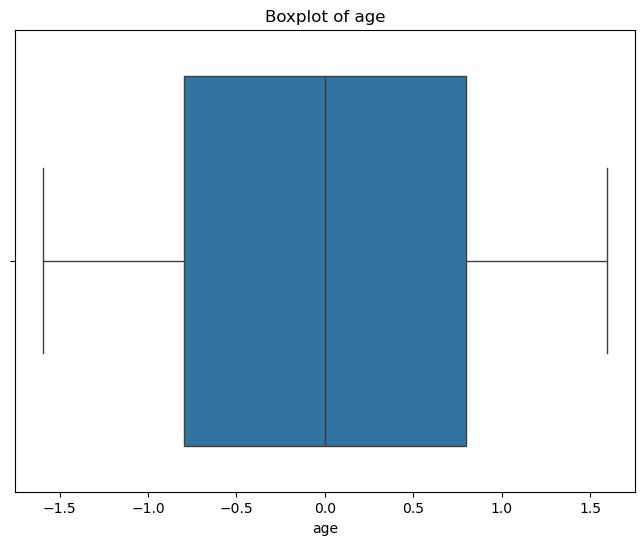

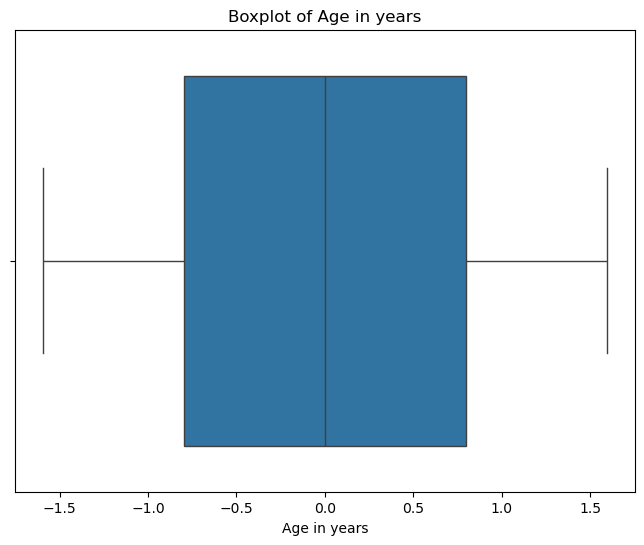

In [23]:
#  2. Exploratory Data Analysis (EDA):
# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, and inconsistencies in the data.
# Visualize the distribution of features, including histograms, box plots, and correlation matrices.

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())


numerical_features = df.select_dtypes(include=['number', 'object'])

# Convert object columns with numerical data to numeric
for col in numerical_features.select_dtypes(include=['object']).columns:
    try:
        # Convert the column to numeric using errors='coerce' to handle non-numeric values
        numerical_features[col] = pd.to_numeric(numerical_features[col], errors='coerce') 
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. It may contain non-numeric values.")


numerical_features = numerical_features.select_dtypes(include=['number']) 
# Check if there are any numerical columns to plot
if not numerical_features.empty:  
    numerical_features.hist(figsize=(15, 10))
    plt.show()
else:
    print("No numerical features found to plot histogram.")

# Box plots
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()


# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify potential outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
#  3. Feature Engineering:
# If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

# Encoding categorical features (if any)
from sklearn.preprocessing import LabelEncoder

categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Handling missing values (if any) - Imputation with mean for numerical
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
df[numerical_features.columns] = numerical_features_scaled

print(df.head())


        age  Age in years
0 -1.593255     -1.013890
1 -1.013890     -1.303572
2  1.593255     -0.724207
3 -1.303572      0.144841
4 -0.434524     -1.593255


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd



# Automatically get the target column (assumed to be the last column)
target_column = df.columns[-1]

# Features and target
X = df.drop(columns=[target_column])
# Convert target to binary (thresholding for classification)
y = (df[target_column] > 0.5).astype(int)  # Adjust threshold if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.3333
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.2500


In [29]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid (exclude 'poisson' to avoid errors with negative targets)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Removed 'poisson'
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    error_score='raise'  # Optional: stop execution on error
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Extract best params and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score (Negative MSE): {best_score}")

# Retrain with best hyperparameters
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse}")


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 10}
Best Cross-Validation Score (Negative MSE): -0.30433673469387756
Mean Squared Error on Test Set: 0.22222222222222224


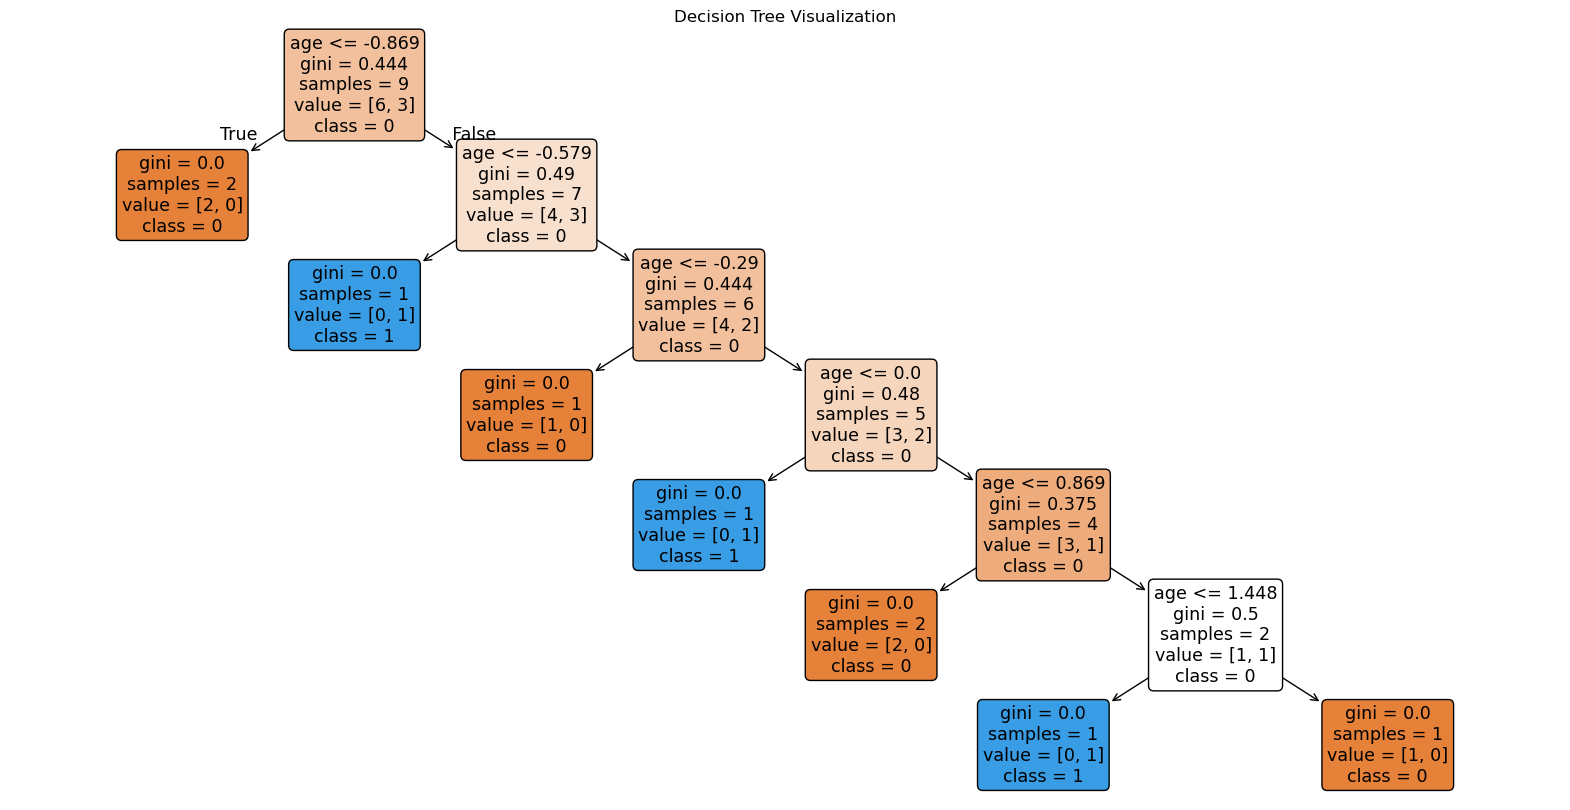


Feature Importances:
  Feature  Importance
0     age         1.0


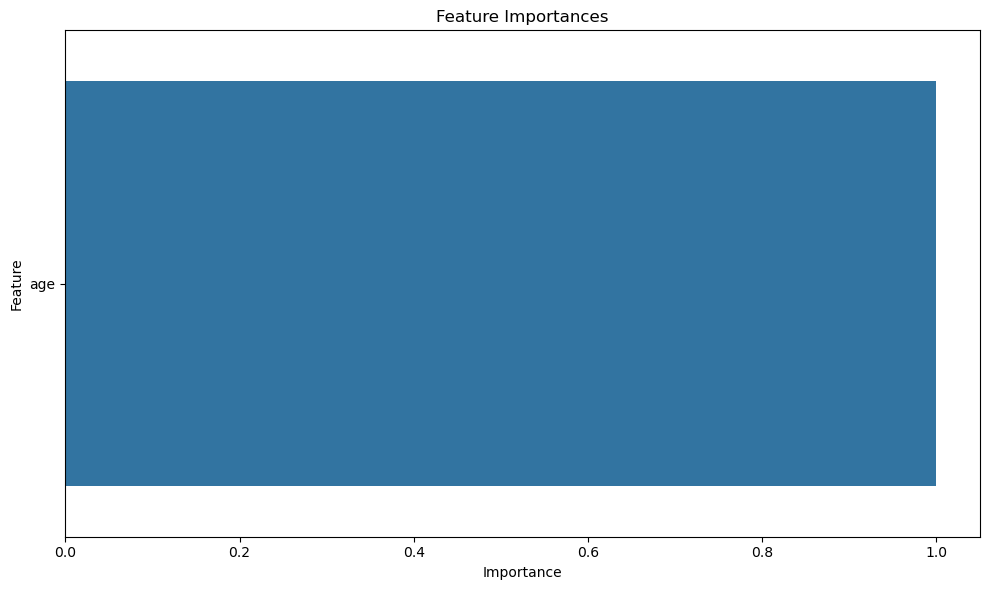

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import pandas as pd

# Visualize the trained Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Analyze and plot feature importances
feature_importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [31]:
# Interview Questions:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# 2. What is the difference between the Label encoding and One-hot encoding?

# 1. Common hyperparameters of decision tree models and their effects:

#  max_depth: The maximum depth of the tree.  A deeper tree can capture more complex relationships in the data, 
#   but may lead to overfitting (performing well on training data but poorly on unseen data).  A shallower tree 
#   is simpler and less prone to overfitting, but may underfit (not capture the true complexity of the data).

#  min_samples_split: The minimum number of samples required to split an internal node. Increasing this value 
#   can prevent the tree from creating overly specific splits based on small amounts of data, reducing overfitting.

#  min_samples_leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, 
#   this helps to avoid creating very small leaf nodes, which might be based on noisy data.

#  criterion: The function to measure the quality of a split. Common options are 'gini' (Gini impurity) and 'entropy'
#   (information gain).  The choice often doesn't significantly affect the overall performance, but it can influence
#   the tree's structure.

#  max_features: The number of features to consider when looking for the best split.  Restricting the number of features
#    can help to reduce overfitting.

# splitter: The strategy used to choose the split at each node. 'best' finds the best split among all features, while
#   'random' considers a random subset of features. 'random' can lead to more diverse trees, reducing overfitting.


# 2. Difference between Label Encoding and One-Hot Encoding:

# Label Encoding: Assigns a unique integer to each category in a categorical feature.  This is suitable for ordinal 
#   categorical features (where the order matters, e.g., low, medium, high). However, it can introduce an artificial 
#   ordering to nominal categorical features (where the order doesn't matter, e.g., colors red, green, blue), which 
#   can mislead some machine learning algorithms.

# One-Hot Encoding: Creates new binary (0 or 1) columns for each category in a categorical feature.  For each row, only 
#   the column corresponding to the category present will have a value of 1; all others will be 0. This avoids the problem 
#   of artificial ordering with nominal features. One-hot encoding is generally preferred for nominal features, but it 
#   can lead to a large increase in the number of features if the original feature has many categories.  This increase in 
#   dimensionality might cause performance issues for some algorithms.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811

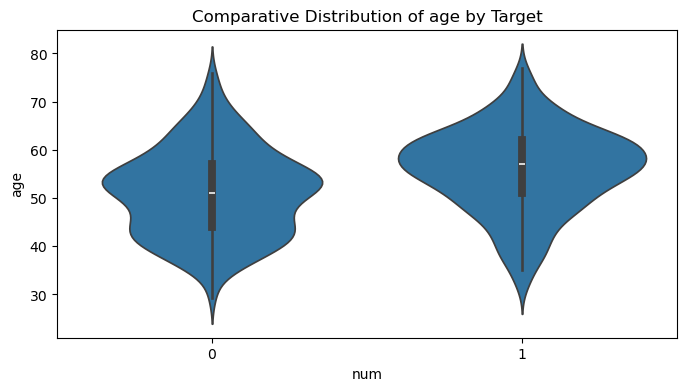

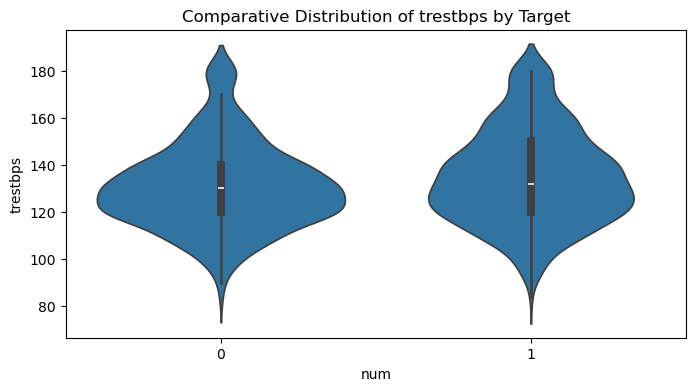

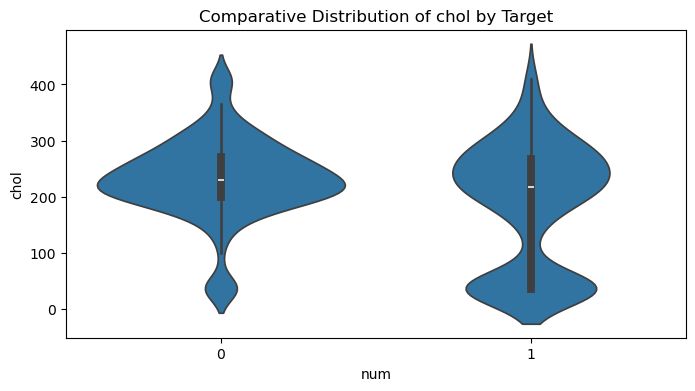

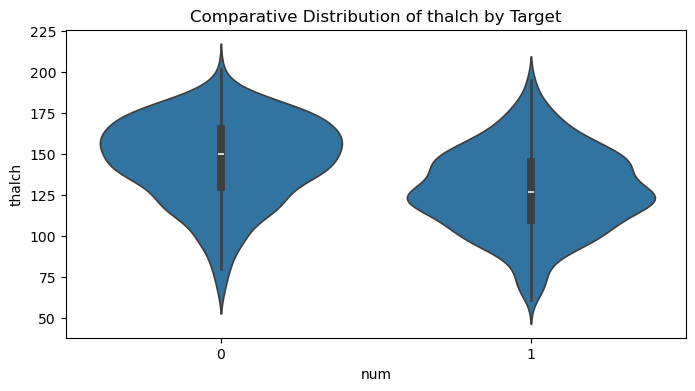

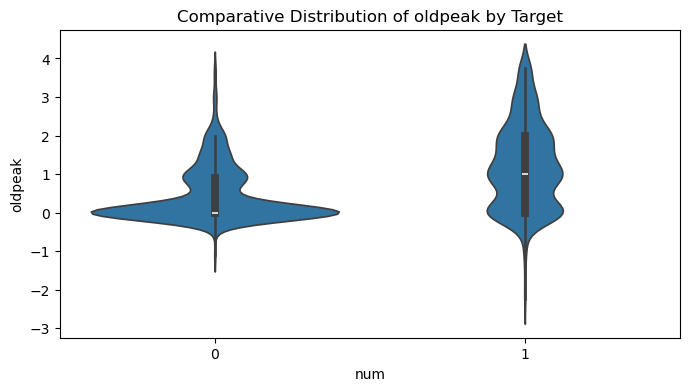

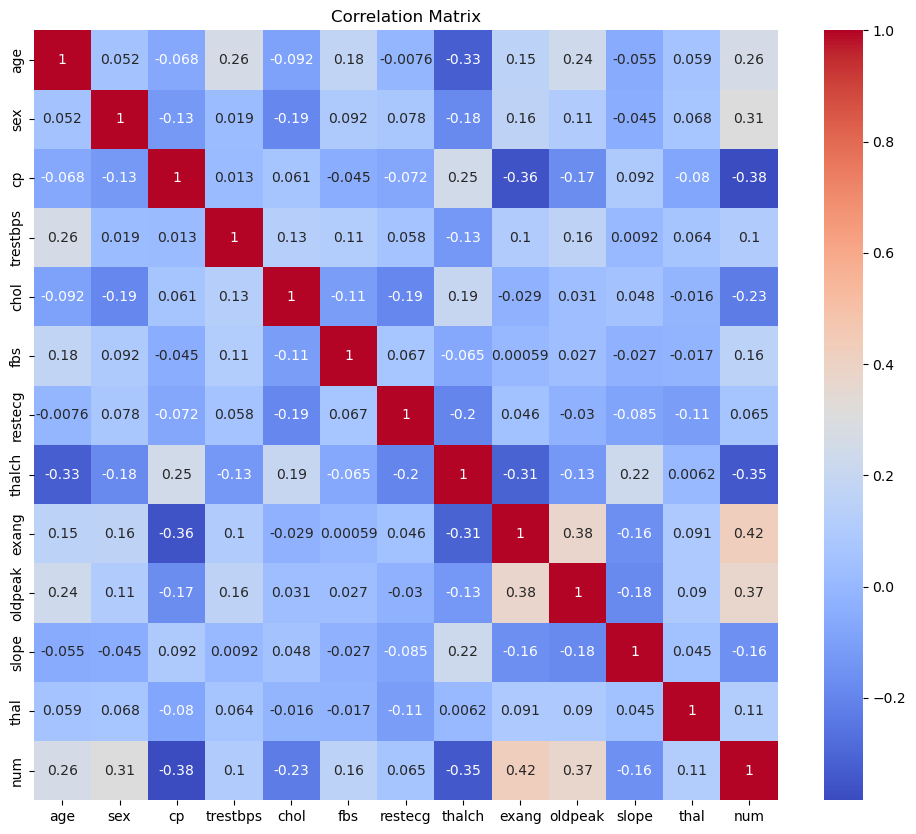

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       122
           1       0.74      0.72      0.73       151

    accuracy                           0.71       273
   macro avg       0.70      0.71      0.70       273
weighted avg       0.71      0.71      0.71       273

Confusion Matrix:
[[ 85  37]
 [ 43 108]]
Accuracy Score: 0.706959706959707


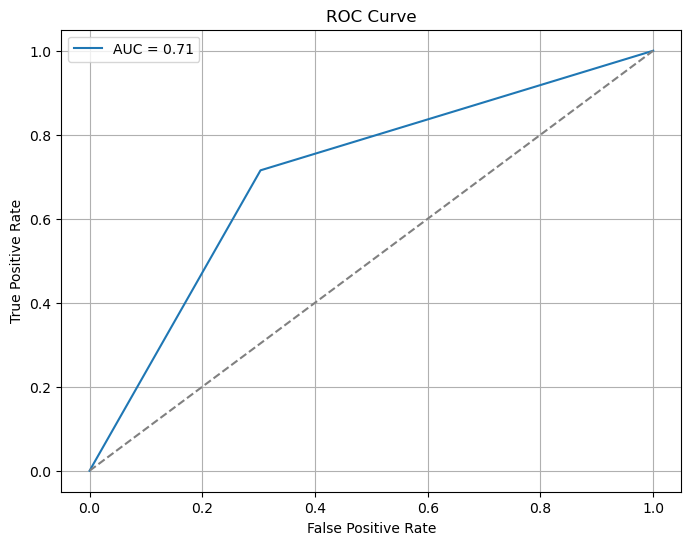

In [11]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

# === Load Data ===
df = pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')


# === Initial Data Checks ===
print(df.info())
print(df.describe())
print(df.isnull().sum())

# === Handle categorical features ===
# === Handle categorical features ===
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_features:
    df[col] = df[col].astype(str)  # Convert all values to string to avoid mixed types
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# === Convert strings to numeric where possible ===
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === Impute Missing Values ===
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())


# === Outlier Detection & Handling (IQR Method) ===
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

# === Comparative EDA ===
df.columns = df.columns.str.strip()  # Clean column names

# Set correct target
target = 'num'

# Optional: Convert to binary classification if needed
df[target] = (df[target] > 0).astype(int)

  # Adjust this if your actual target column has a different name
for col in df.drop(columns=[target]).select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=target, y=col, data=df)
    plt.title(f'Comparative Distribution of {col} by Target')
    plt.show()

# === Correlation Heatmap ===
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# === Feature Scaling ===
scaler = StandardScaler()
features = df.drop(columns=[target])
X_scaled = scaler.fit_transform(features)
y = df[target]

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# === Model Training ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# === Model Evaluation ===
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# === ROC AUC Curve ===
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Interview Questions:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# 2. What is the difference between the Label encoding and One-hot encoding?

# 1. Common hyperparameters of decision tree models and their effects:

#  max_depth: The maximum depth of the tree.  A deeper tree can capture more complex relationships in the data, 
#   but may lead to overfitting (performing well on training data but poorly on unseen data).  A shallower tree 
#   is simpler and less prone to overfitting, but may underfit (not capture the true complexity of the data).

#  min_samples_split: The minimum number of samples required to split an internal node. Increasing this value 
#   can prevent the tree from creating overly specific splits based on small amounts of data, reducing overfitting.

#  min_samples_leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, 
#   this helps to avoid creating very small leaf nodes, which might be based on noisy data.

#  criterion: The function to measure the quality of a split. Common options are 'gini' (Gini impurity) and 'entropy'
#   (information gain).  The choice often doesn't significantly affect the overall performance, but it can influence
#   the tree's structure.

#  max_features: The number of features to consider when looking for the best split.  Restricting the number of features
#    can help to reduce overfitting.

# splitter: The strategy used to choose the split at each node. 'best' finds the best split among all features, while
#   'random' considers a random subset of features. 'random' can lead to more diverse trees, reducing overfitting.


# 2. Difference between Label Encoding and One-Hot Encoding:

# Label Encoding: Assigns a unique integer to each category in a categorical feature.  This is suitable for ordinal 
#   categorical features (where the order matters, e.g., low, medium, high). However, it can introduce an artificial 
#   ordering to nominal categorical features (where the order doesn't matter, e.g., colors red, green, blue), which 
#   can mislead some machine learning algorithms.

# One-Hot Encoding: Creates new binary (0 or 1) columns for each category in a categorical feature.  For each row, only 
#   the column corresponding to the category present will have a value of 1; all others will be 0. This avoids the problem 
#   of artificial ordering with nominal features. One-hot encoding is generally preferred for nominal features, but it 
#   can lead to a large increase in the number of features if the original feature has many categories.  This increase in 
#   dimensionality might cause performance issues for some algorithms.
